In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('Customer Churn.csv')

In [42]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
df.shape

(7043, 21)

In [44]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

we have 7043 rows and 21 columns

we have target variable variable churn

at the end we have 3 numerical variable and 18 categorical variable out of which customer id is un necessary

In [45]:
df.drop(['customerID'],axis=1,inplace=True)

In [46]:
Categorical=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
            'Contract','PaperlessBilling','PaymentMethod','SeniorCitizen','Churn']

Numerical=['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis

Before going to statistical exloration we need to check the missing value

# Data integrity Check

In [47]:
df.duplicated().sum()

22

we can see 22 duplicate entry in data set

In [48]:
df.drop_duplicates(keep='last',inplace=True)

In [49]:
df.shape

(7021, 20)

Need to check white spaces also

In [50]:
df.isin(['','NA','-']).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is possibility of white spaces in total charges lets deal with it

In [51]:
df['TotalCharges'].isin(['']).sum().any()

False

In [52]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in Totalcharges

In [53]:
df[df["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [54]:
df.drop(labels=df[df["tenure"] == 0].index, axis = 0, inplace = True)

In [55]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [56]:
df["TotalCharges"]=pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

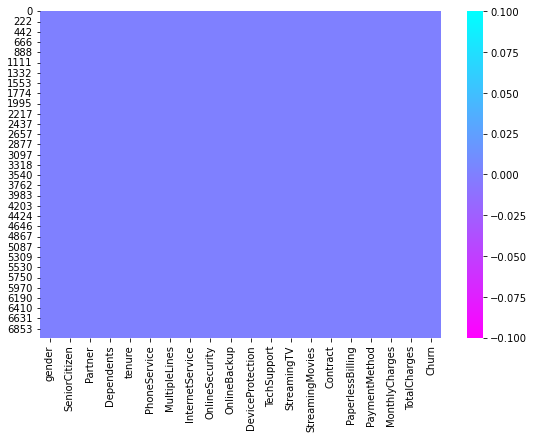

In [57]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

Finally no missing Value

# Statistical Matrix

In [58]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'],cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7010.000000,0.162767,0.369180,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7010.000000,32.520399,24.520441,1.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,7010.000000,64.888666,30.064769,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7010.000000,2290.353388,2266.820832,18.800000,408.312500,1403.875000,3807.837500,8684.800000


In [59]:
df[Categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7010.0,0.162767,0.36918,0.0,0.0,0.0,0.0,1.0


In [60]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3535
Female    3475
Name: gender, dtype: int64
Partner
No     3617
Yes    3393
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2099
Name: Dependents, dtype: int64
PhoneService
Yes    6330
No      680
Name: PhoneService, dtype: int64
MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64
OnlineSecurity
No                     3489
Yes                    2015
No internet service    1506
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3079
Yes                    2425
No internet service    1506
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3086
Yes                    2418
No internet service    1506
Name: DeviceProtection, dtype: int64
TechSupport
No                     3464
Yes                    2040
No internet service    1506
Name: T

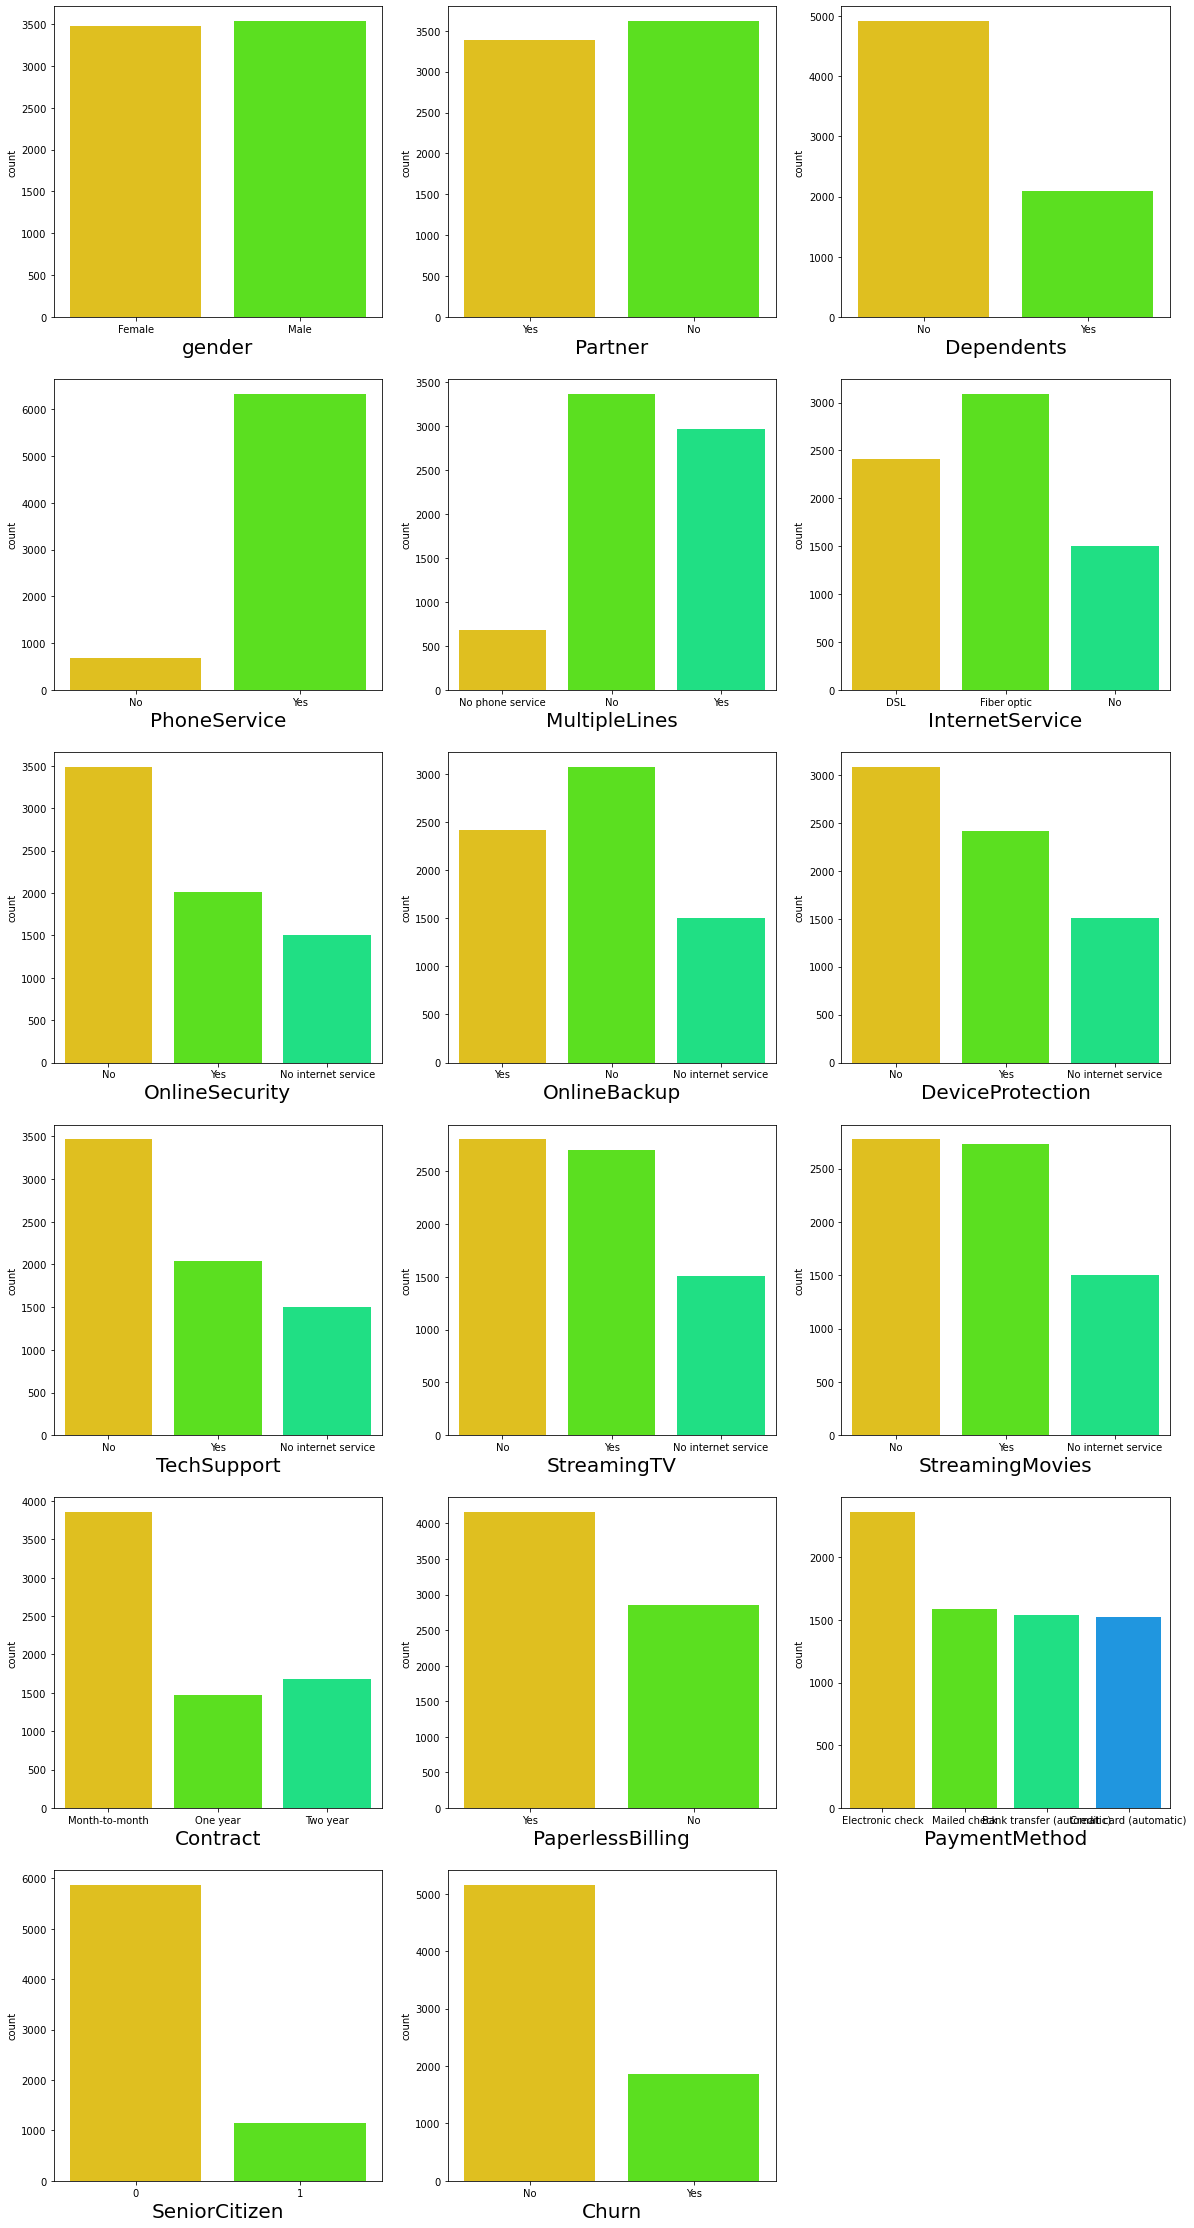

In [62]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40),facecolor='white')
plotnumber=1
for i in Categorical:
    if plotnumber <=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

Okay then need to exploring feature one by one

# Target Variable Churn

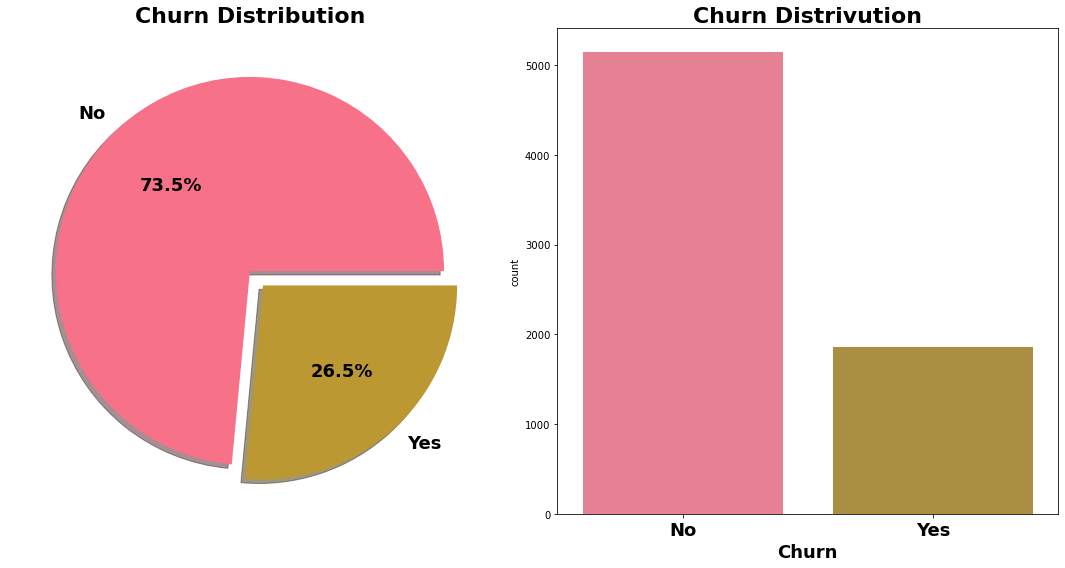

In [64]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distrivution',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

26.4% customer choose churn service last mo nth which is quite high

This lead s to imbalanced data case as churn is our target variable 

# Gender Vs Churn

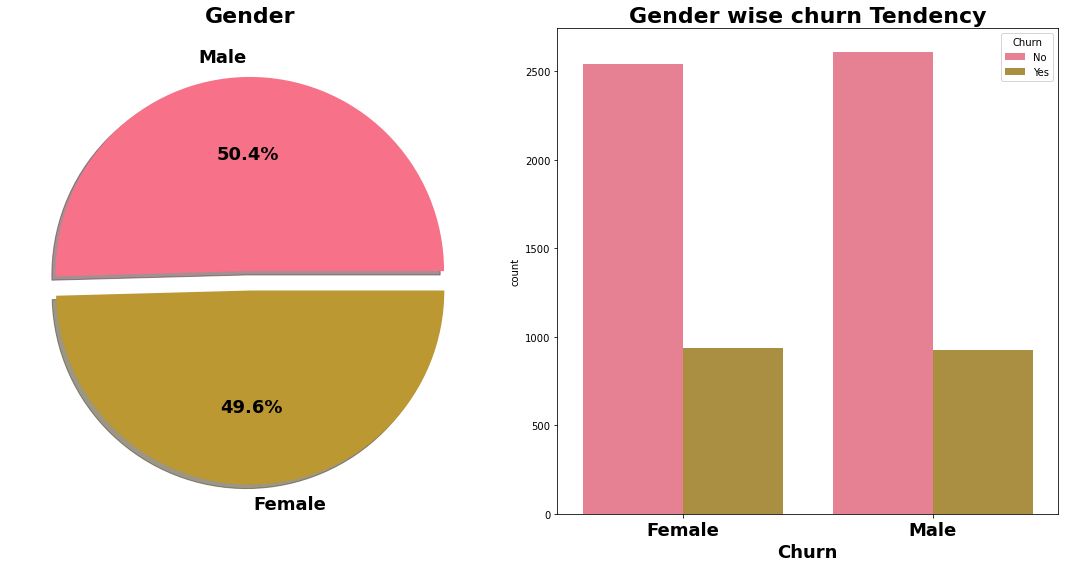

In [65]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Gender',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender wise churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

In [66]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2541,934,3475
Male,2612,923,3535
All,5153,1857,7010


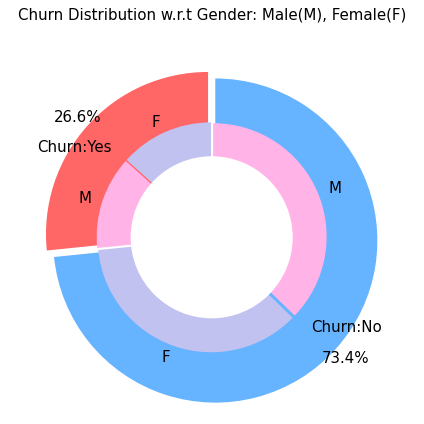

In [67]:
plt.figure(figsize=(6,6))
labels=["Churn:Yes","Churn:No"]
values=[1869,5152]
labels_gender=["F","M","F","M"]
sizes_gender=[939,930,2544,2619]
colors=['#ff6666','#66b3ff']
colors_gender=['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

Data contains both gender almost in same propotion

# Senior Citizen vs Gender wise Churn

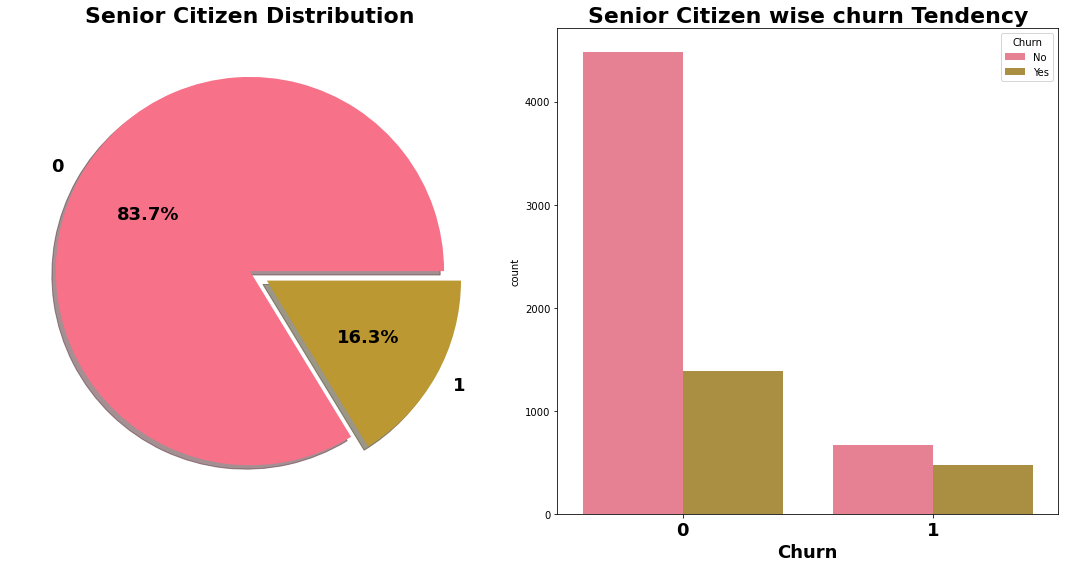

In [68]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen wise churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

There are only 16.3% of the the people are senior citizen and most of them are younger people 

In [70]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

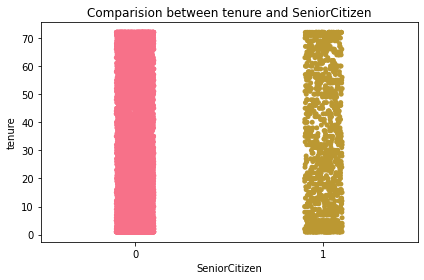

In [71]:
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot(x="SeniorCitizen",y="tenure",data=df)
plt.show()

There is no relation between senior citizen and tenure

# Effect of partner and Distribution on Churn

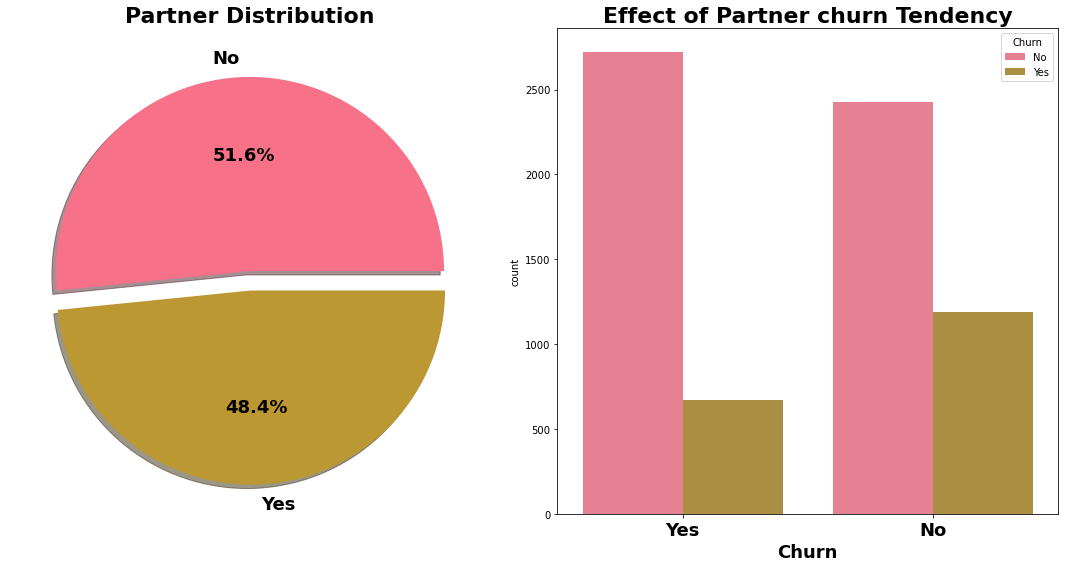

In [72]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

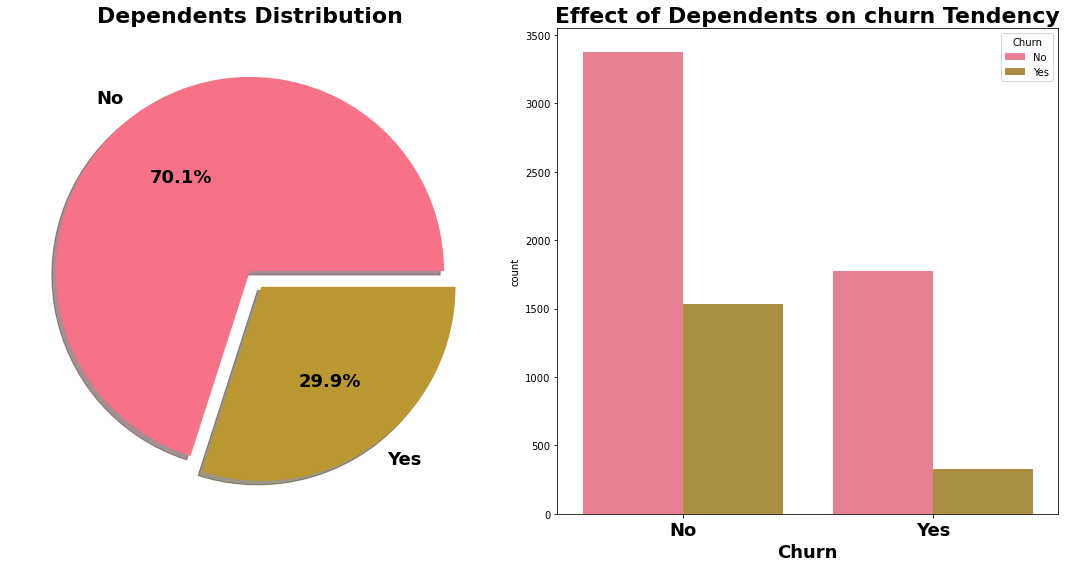

In [73]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

Customer having partner less tendency to churn

above 30% customer have dependednts on them and they have less tendency to churn

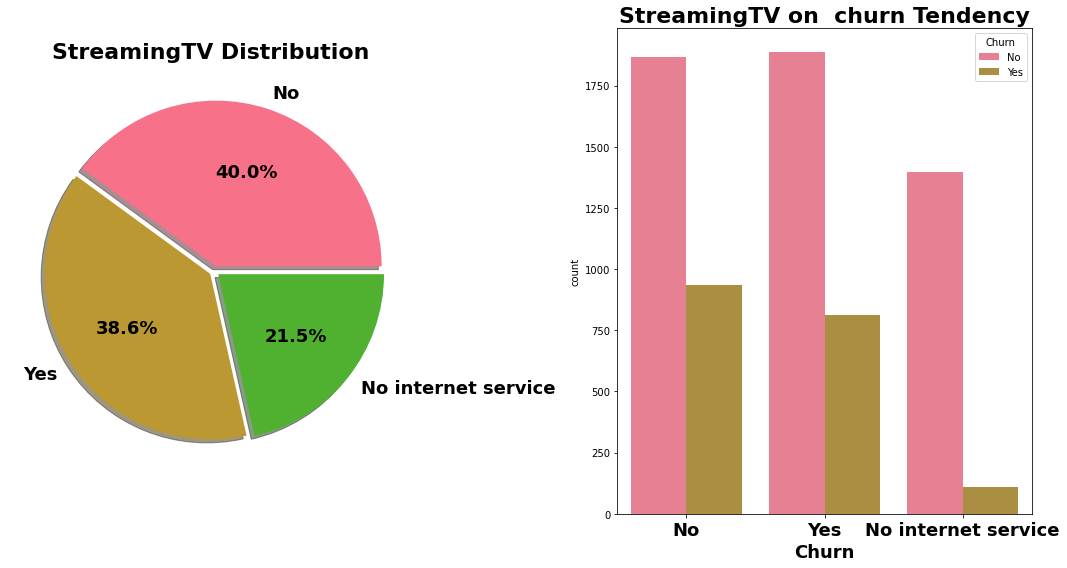

In [75]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution ',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('StreamingTV on  churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

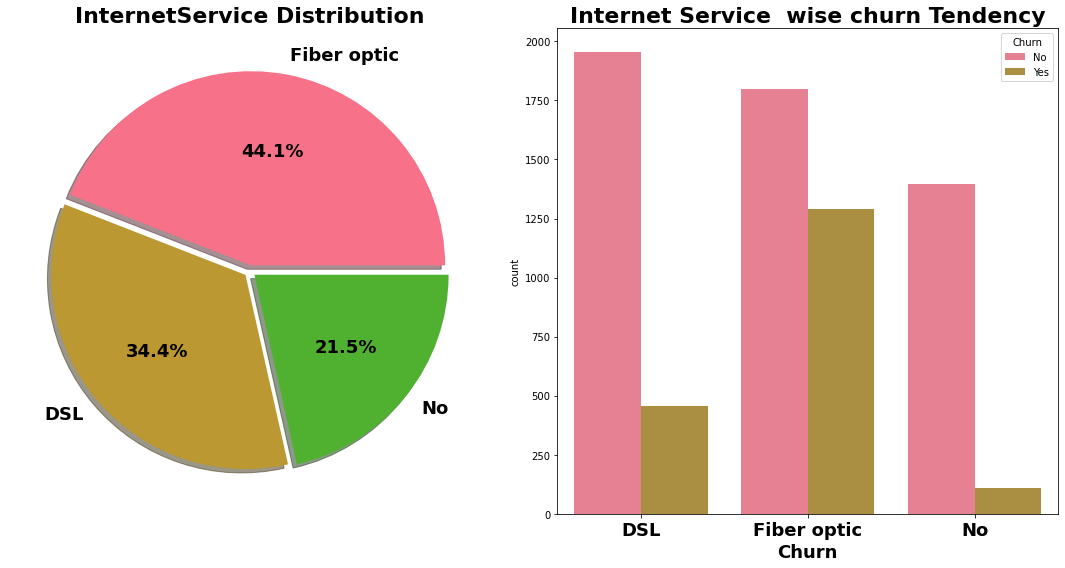

In [77]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Internet Service  wise churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

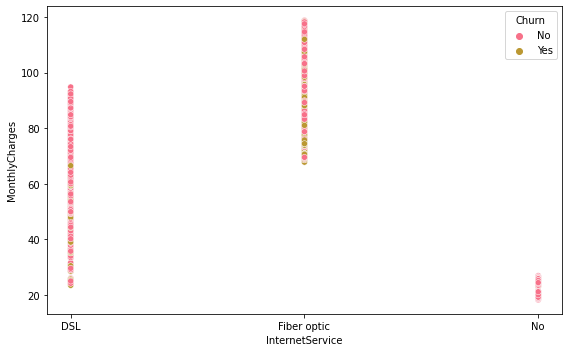

In [79]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService",y='MonthlyCharges',data=df,hue="Churn")
plt.show()

44% customer prefer fiberoptics as internet services we can find high churn rate among them




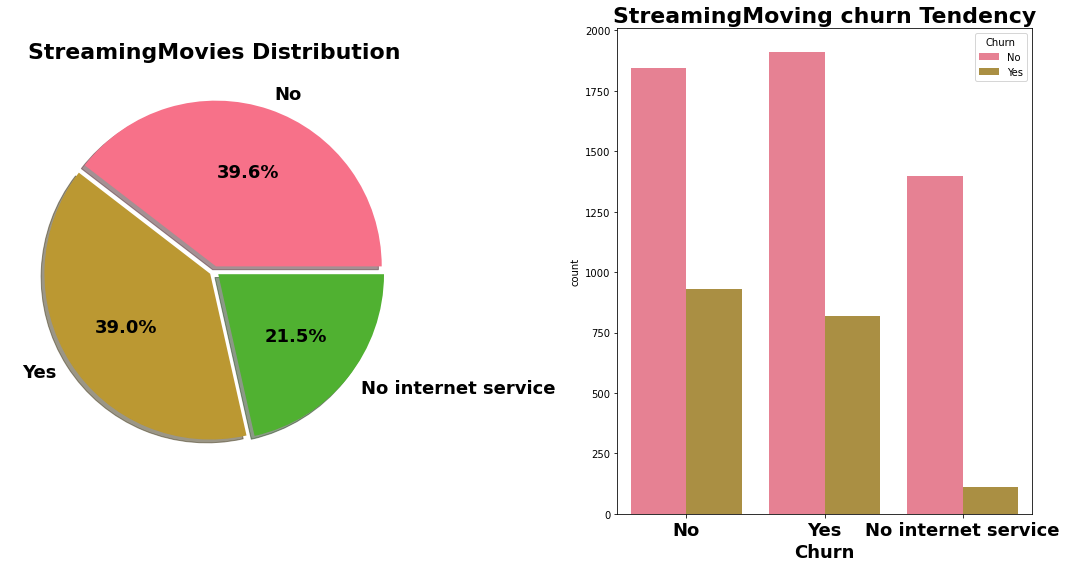

In [81]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('StreamingMoving churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

Almost same churn tendency in people streaming movies and not 

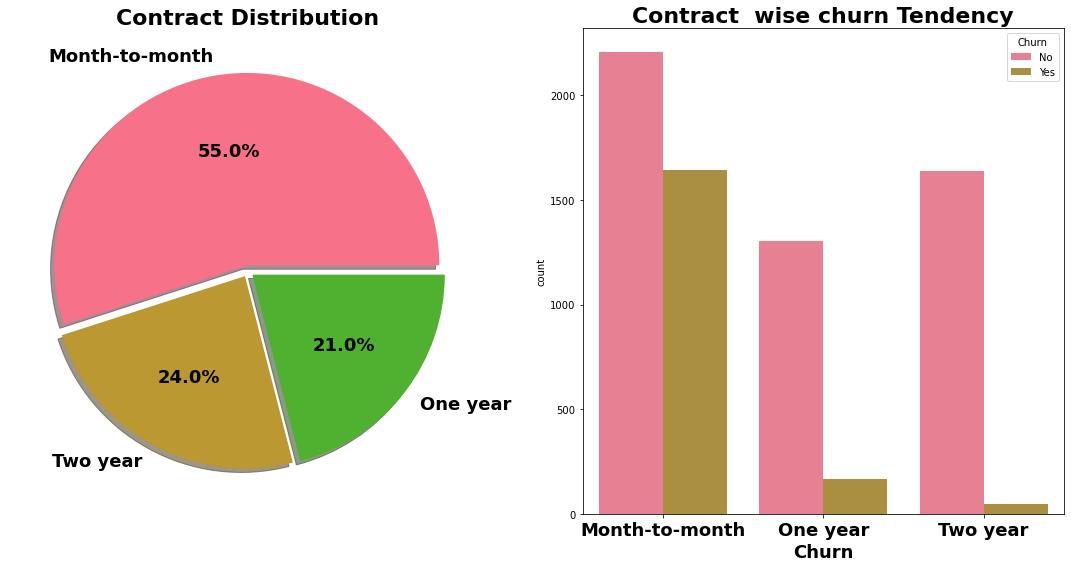

In [83]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Contract  wise churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

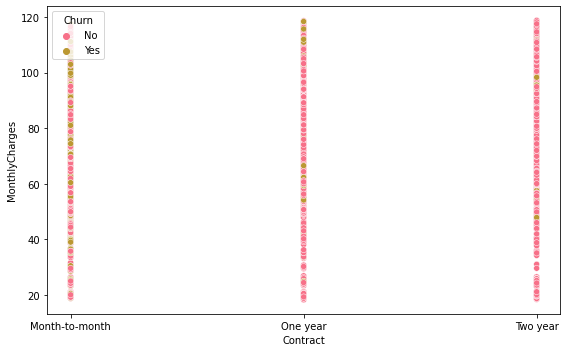

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract",y="MonthlyCharges",data=df,hue="Churn")
plt.show()

We didnot find any relation between monthly charges and tenure


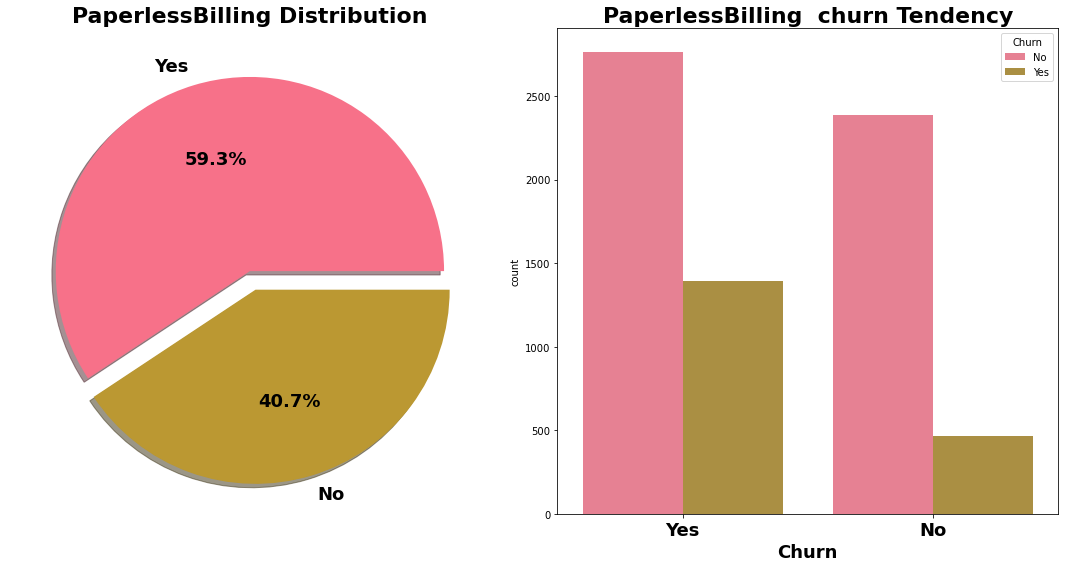

In [85]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                   textprops={'fontweight':'bold','fontsize':18},ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('PaperlessBilling  churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=18,fontweight='bold')
plt.show()

60% customer prefer paperlessbilling

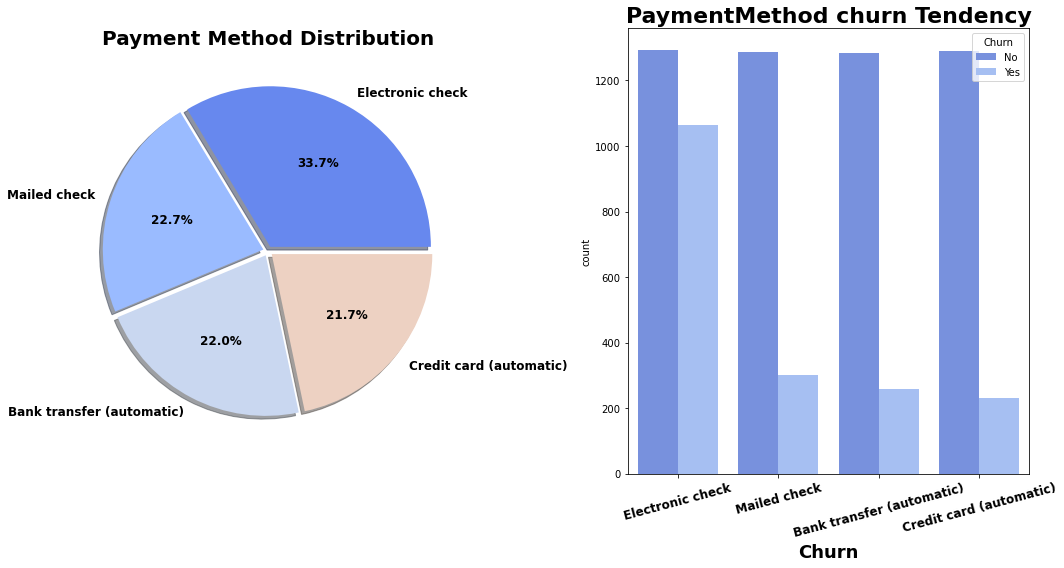

In [90]:
plt.rcParams["figure.autolayout"]=True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                   textprops={'fontweight':'bold','fontsize':12},ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution',fontsize=20,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('PaymentMethod churn Tendency',fontsize=22,fontweight='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight='bold')
plt.xticks(fontsize=12,rotation=15,fontweight='bold')
plt.show()

we can see attrition tendency in customer who pay by electronic check

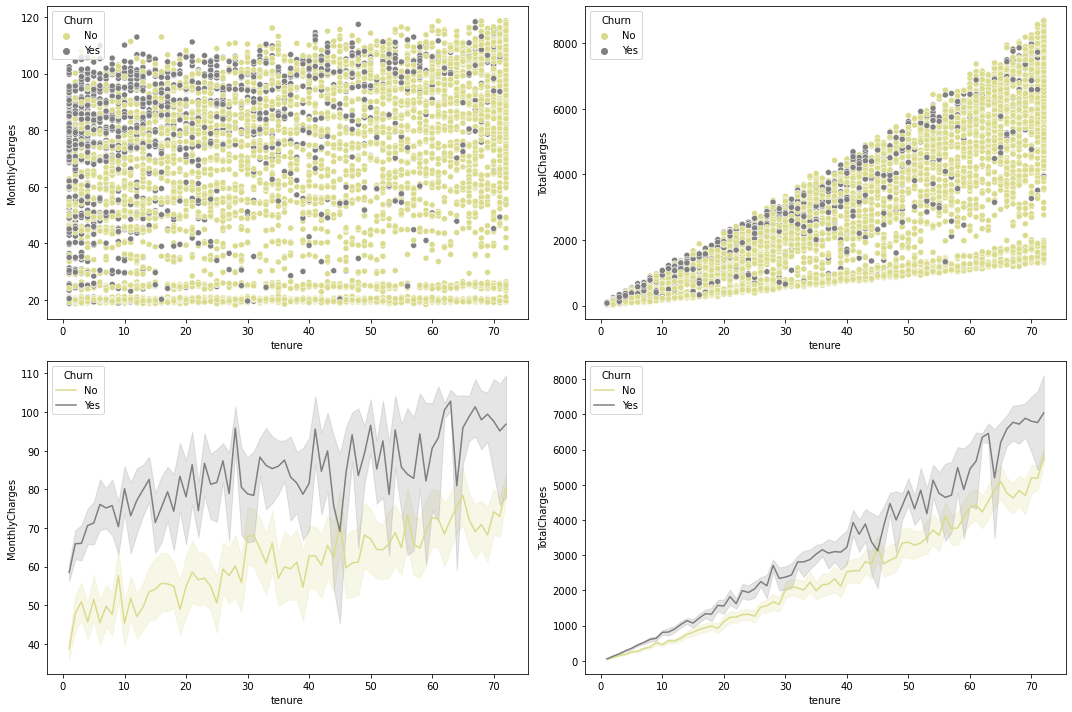

In [94]:
sns.set_palette('tab20_r')
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure",y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure",y=col,data=df,hue="Churn")

High Monthly charges in customer who choose churn compare to rest

same goes with High Total Charges who choose churn compares to rest

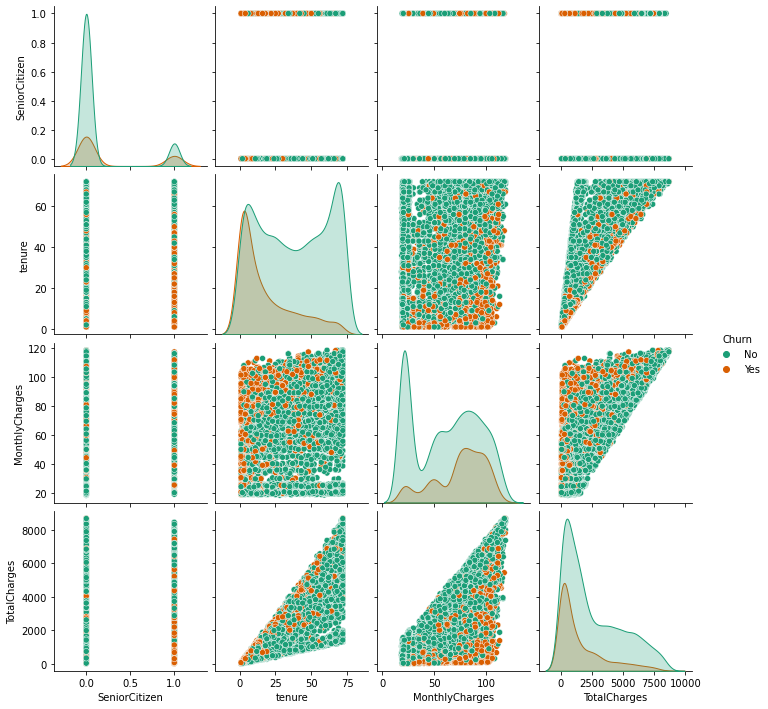

In [95]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding Categorical Data

In [96]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
Numerical=['tenure','MonthlyCharges','TotalCharges']

In [99]:
Category=['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Outliers Detection and Removal

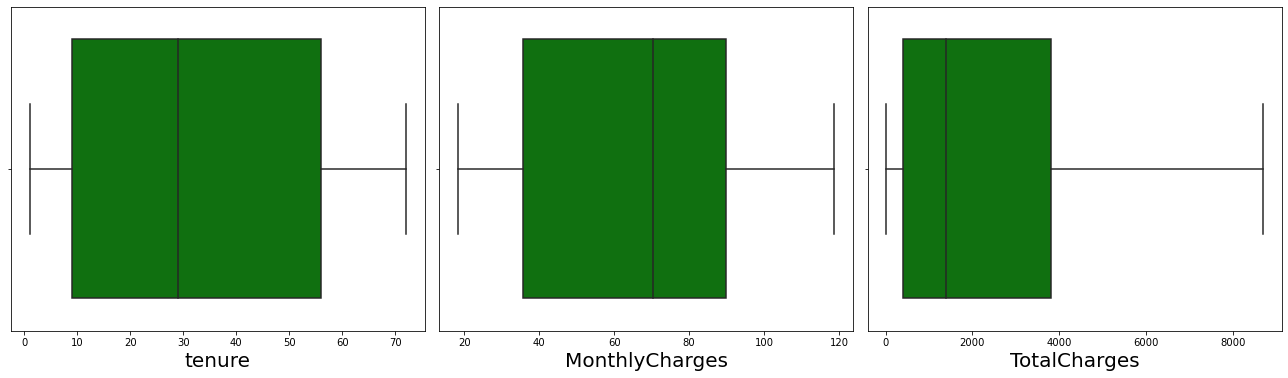

In [101]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From Boxplot we can see No ouyliers exist dataset

# Outliers Removal using Zscore method

In [102]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

print("Shape of dataframe before removing outliers:",df.shape)
print("Shape of the dataframe after removing outliers:",df1.shape)
print("Percentage databloss after removal:",(df.shape[0]-df.shape[0])/df1.shape[0]*100)

Shape of dataframe before removing outliers: (7010, 20)
Shape of the dataframe after removing outliers: (6330, 20)
Percentage databloss after removal: 0.0


In [103]:
df.drop(['PhoneService'],axis=1,inplace=True)

# Skewness

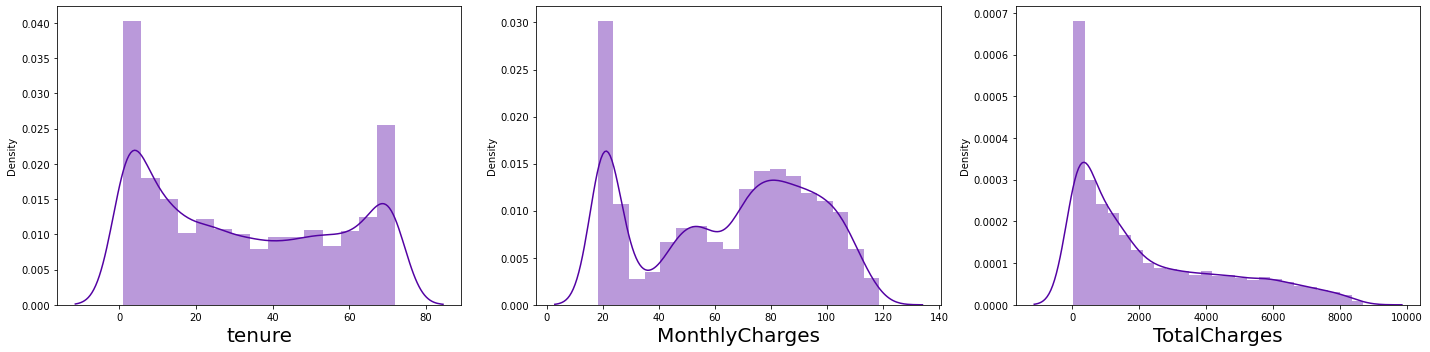

In [105]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
        plotnum+=1
plt.show()

In [106]:
df.skew()

gender             -0.017123
SeniorCitizen       1.827450
Partner             0.063955
Dependents          0.876026
tenure              0.233740
MultipleLines       0.112710
InternetService     0.208868
OnlineSecurity      0.417818
OnlineBackup        0.182498
DeviceProtection    0.186435
TechSupport         0.403115
StreamingTV         0.027245
StreamingMovies     0.011676
Contract            0.630191
PaperlessBilling   -0.379332
PaymentMethod      -0.165526
MonthlyCharges     -0.225686
TotalCharges        0.958322
Churn               1.065722
dtype: float64

In [107]:
df['TiotalCharges']=np.log1p(df['TotalCharges'])

# Correlation

In [108]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TiotalCharges
gender,1.000000,-0.001069,-0.000583,0.010912,0.006370,-0.006107,-0.003143,-0.015145,-0.012045,0.001250,-0.006916,-0.005662,-0.008958,0.000780,-0.011497,0.015889,-0.012361,0.000879,-0.008694,-0.004048
SeniorCitizen,-0.001069,1.000000,0.016030,-0.211479,0.014456,0.145621,-0.031066,-0.127982,-0.013398,-0.021174,-0.151088,0.030946,0.047029,-0.142890,0.155922,-0.036921,0.219131,0.101642,0.151270,0.099272
Partner,-0.000583,0.016030,1.000000,0.451254,0.379564,0.140133,0.003292,0.150372,0.152434,0.165035,0.126178,0.135781,0.128968,0.292330,-0.014856,-0.153504,0.095277,0.317021,-0.148670,0.335381
Dependents,0.010912,-0.211479,0.451254,1.000000,0.161288,-0.027064,0.046046,0.151016,0.089719,0.079203,0.132310,0.045470,0.021293,0.239279,-0.110973,-0.039886,-0.114641,0.062762,-0.162366,0.090713
tenure,0.006370,0.014456,0.379564,0.161288,1.000000,0.341092,-0.026302,0.327588,0.372391,0.372635,0.324995,0.289941,0.296141,0.675876,0.003709,-0.367462,0.244194,0.825293,-0.353339,0.833847
MultipleLines,-0.006107,0.145621,0.140133,-0.027064,0.341092,1.000000,-0.106444,0.006767,0.116575,0.121931,0.010384,0.174570,0.180860,0.108741,0.164971,-0.173869,0.432571,0.451510,0.040181,0.434391
InternetService,-0.003143,-0.031066,0.003292,0.046046,-0.026302,-0.106444,1.000000,-0.029011,0.036332,0.045177,-0.026600,0.108283,0.098053,0.102317,-0.136588,0.081012,-0.319423,-0.173540,-0.047169,-0.199578
OnlineSecurity,-0.015145,-0.127982,0.150372,0.151016,0.327588,0.006767,-0.029011,1.000000,0.184027,0.174864,0.284102,0.043283,0.055206,0.374122,-0.157104,-0.096837,-0.053041,0.254466,-0.288246,0.223375
OnlineBackup,-0.012045,-0.013398,0.152434,0.089719,0.372391,0.116575,0.036332,0.184027,1.000000,0.186649,0.194673,0.145971,0.135948,0.280295,-0.011890,-0.125415,0.120560,0.375430,-0.193979,0.311678
DeviceProtection,0.001250,-0.021174,0.165035,0.079203,0.372635,0.121931,0.045177,0.174864,0.186649,1.000000,0.239621,0.275005,0.288379,0.349868,-0.036844,-0.136377,0.164735,0.388975,-0.176520,0.332474


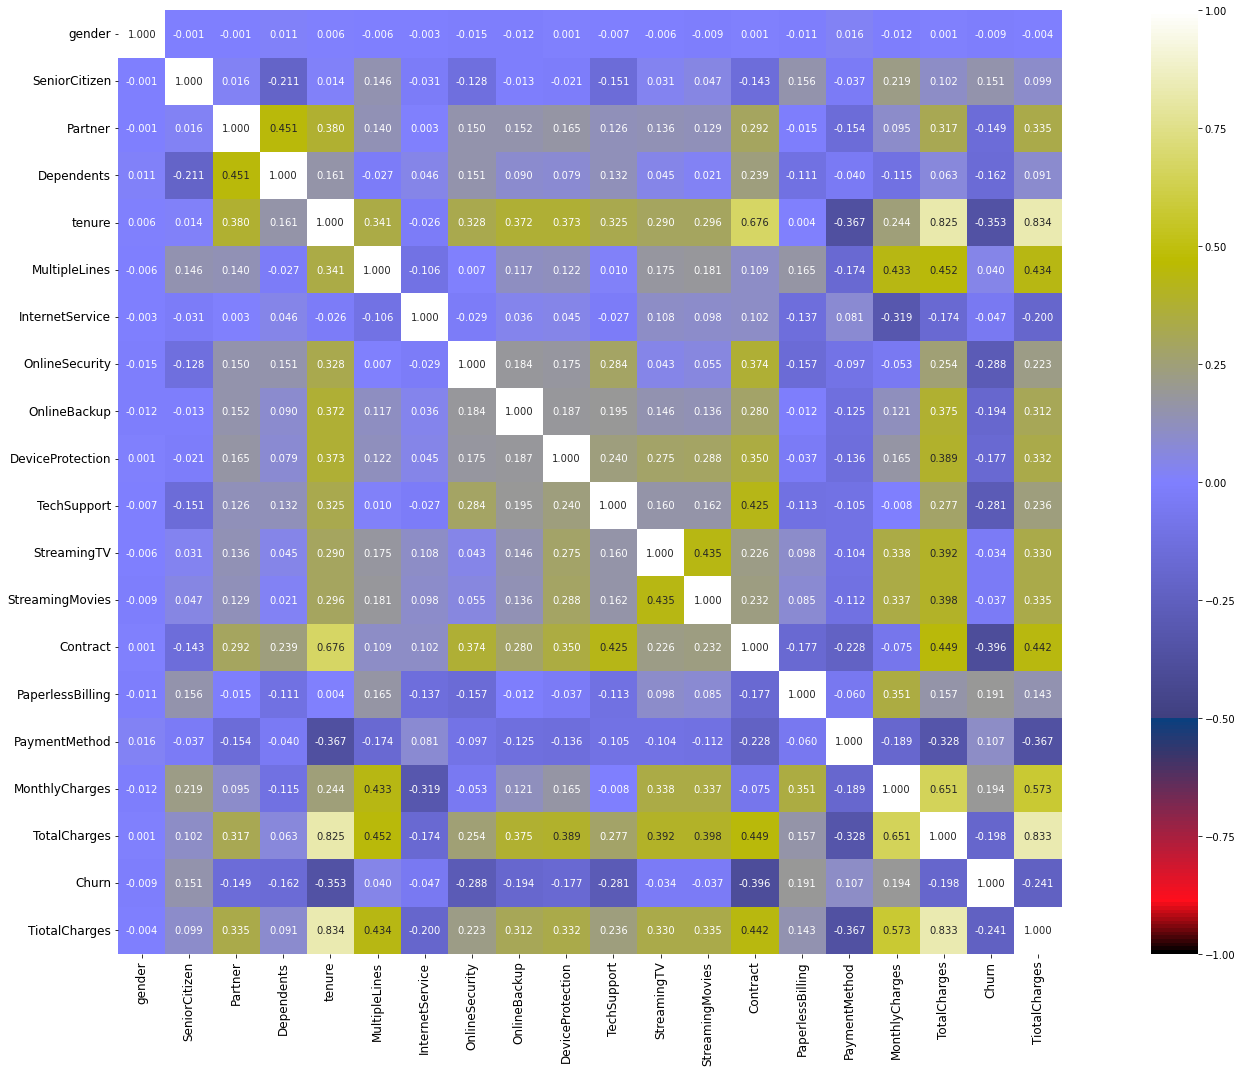

In [109]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,square=True,fmt='0.3f',
           annot_kws={'size':10},cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

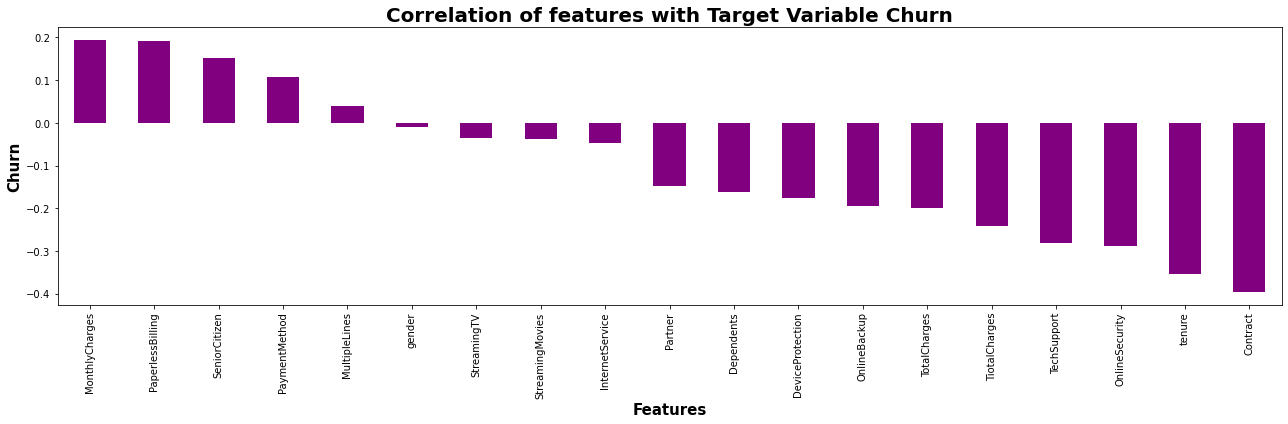

In [110]:
plt.figure(figsize=(18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize=20,fontweight='bold')
plt.show()

In [116]:
X=df.drop(['Churn'],axis=1)
Y=df['Churn']

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

# PCA

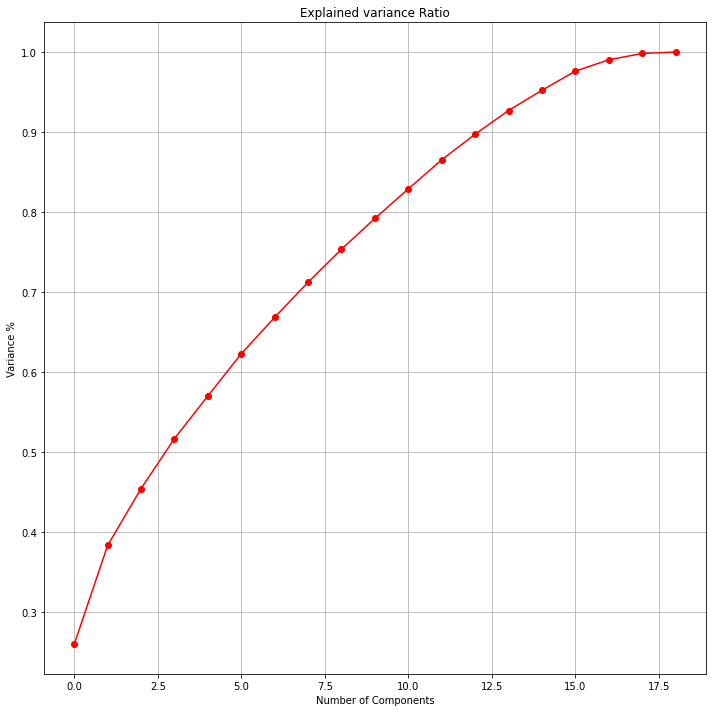

In [122]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()


as per graph we can see that 13 principle component attribute for 90% of variation in the data

In [123]:
pca_new=PCA(n_components=13)
x_new=pca_new.fit_transform(X_scale)

In [125]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Machine Learning Model Building

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(principle_x,Y,random_state=99,test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4907, 13)
Training target vector size: (4907,)
Test feature matrix size: (2103, 13)
Test target vector size: (2103,)


# Finding Best Random state

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range (1,250):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scale,Y,test_size=0.3,random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.8245363766048502 on Random_state 81


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8131241084165478


Confusion matrix of Logistics Regression : 
 [[1414  150]
 [ 243  296]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1564
           1       0.66      0.55      0.60       539

    accuracy                           0.81      2103
   macro avg       0.76      0.73      0.74      2103
weighted avg       0.80      0.81      0.81      2103



# Finding Optimal value of n_neighbors for KNN

In [135]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val=[]
for K in range(20):
    K=K+1
    model=neighbors.KNeighborsClassifier(n_neighbors=K)
    
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    error=sqrt(mean_squared_error(Y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k=',K,'is',error)

RMSE value for k= 1 is 0.5305682004337047
RMSE value for k= 2 is 0.4948618543330952
RMSE value for k= 3 is 0.4972582937936305
RMSE value for k= 4 is 0.4890624916918474
RMSE value for k= 5 is 0.48564754972948243
RMSE value for k= 6 is 0.4851577386621155
RMSE value for k= 7 is 0.47824771294859436
RMSE value for k= 8 is 0.47073156609990807
RMSE value for k= 9 is 0.47325021203950357
RMSE value for k= 10 is 0.47123637221397147
RMSE value for k= 11 is 0.46972032633669036
RMSE value for k= 12 is 0.4656534071364088
RMSE value for k= 13 is 0.46514254202688604
RMSE value for k= 14 is 0.4620654903324396
RMSE value for k= 15 is 0.4636065690644338
RMSE value for k= 16 is 0.45948554001578207
RMSE value for k= 17 is 0.4579305929505661
RMSE value for k= 18 is 0.4506032306995597
RMSE value for k= 19 is 0.45637034789359315
RMSE value for k= 20 is 0.45165727478465995


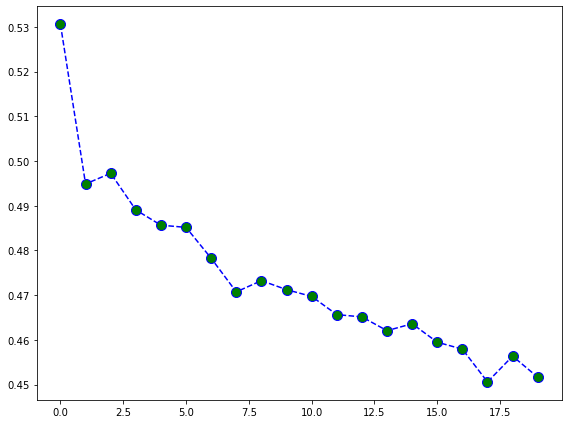

In [136]:
plt.figure(figsize=(8,6))
plt.plot(range(20),rmse_val,color='blue',linestyle='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.show()

At k=18 we gwt minimum RMSE value which is approx 0.4506032306995597 


We can safely say that k=18 will give us best results

# Applying other classification algorithm

In [142]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8007608178792202


Confusion matrix : 
 [[1411  141]
 [ 278  273]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.66      0.50      0.57       551

    accuracy                           0.80      2103
   macro avg       0.75      0.70      0.72      2103
weighted avg       0.79      0.80      0.79      2103



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8002853067047075


Confusion matrix : 
 [[1428  124]
 [ 296  255]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.67      0.46      0.55       551

    accuracy                           0.80      2103
   macro avg       0.75      0.69      0.71      2103
weighted avg       0.79      0.80      0

In [141]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('=========================================================')



Cross Validation Score LogisticRegression() :

Score : [0.78958631 0.79243937 0.79743224 0.80670471 0.80670471]
Mean Score : 0.7985734664764623
Std deviation : 0.007098348248002663




Cross Validation Score SVC() :

Score : [0.79671897 0.79243937 0.7874465  0.79957204 0.80313837]
Mean Score : 0.7958630527817403
Std deviation : 0.005476848450913715




Cross Validation Score GaussianNB() :

Score : [0.7767475  0.79386591 0.7853067  0.79457917 0.79029957]
Mean Score : 0.7881597717546363
Std deviation : 0.006583726538781355




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71825963 0.70898716 0.71112696 0.7211127  0.70613409]
Mean Score : 0.7131241084165478
Std deviation : 0.005659581861591251




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.79457917 0.79243937 0.7788873  0.77603424 0.78174037]
Mean Score : 0.7847360912981455
Std deviation : 0.007417974322396554




Cross Validation Score RandomForestClassifier() :

Score : [0.78031384 0.777

# Hyper Parameter Tuning :GridSearchCV

In [143]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameter={'bootstrap':[True],'max_depth':[5,10,20,40,50,60],
          'max_features':['auto','log2'],'criterion':['gini','entropy'],
          'n_estimators':[5,10,15,25,50,60,70]}

In [147]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.790 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.776 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.800 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.809 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [149]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 25}

In [150]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=5 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7998097955301949


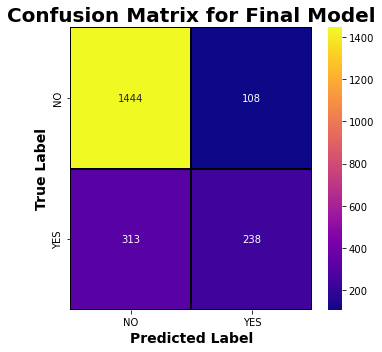

In [151]:
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

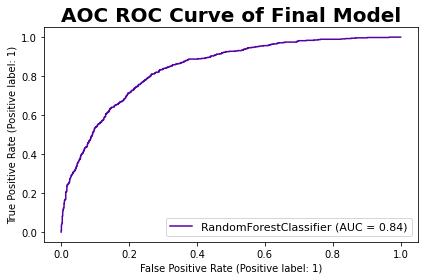

Auc Score :
 0.6811771474544877


In [152]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)